# Project: Investigate Movies dataset from the famous movie application (IMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset contains data collected from 10866 Movies from 1960 until 2015, it contains some really interesting information such as popularity, budget, genres, ratings and much more!.

Througout this project, we will analyze the data and see what are the attributes that have an impact in movie ratings and provide a brief description of this dataset



In [417]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('tmdb-movies.csv')
df.head()
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Attributes explanation:
- id = movie id<br>
- imdb_id = the id for the movie in imdb website<br>
- popularity = number of people who watched the movie<br>
- budget = budget for each movie<br>
- revenue = movie's revenue<br>
- original_title = movie title<br>
- cast = group of people who participated in the movie<br>
- homepage = movie's website<br>
- director = movie director<br>
- tagline = movie's slogan<br>
- keywords = words that explains what the movie is about<br>
- overview = brief description of what the movie is about<br>
- runtime = movie duration<br>
- gentes = type of movie<br>
- production_companies = company that produced the movie<br>
- release_date = the day the movie was released<br>
- vote_count = number of votes for the movie<br>
- vote_average = movie rating<br>
- release_year = the year the movie was released<br>
- budjet_adj = ???<br>
- revenue_adj = ???<br>

In [355]:
df.shape

(10866, 21)

# looks like we have 10866 movies and 21 attributes in this dataset!

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


- looks like the average popularity for those movies is around 646K altough one movie was watched by approximately 33 million people.
- average budget for movies is around 146 million dollars, and the movie with the highest budget is 'The warrior's way' with a a bodget of 425 million dolars ( code for finding the movie title with maximun budget is written below )
- you'll be shocked by this fact!, can you believe that over 50% of the movies in this dataset didn't have revenue at all!, I mean "ZERO" revenue, that's shocking!.
- average movie duration is an hour and 40 minutes, the longest movie duration is 900 minutes (15 hours), I can't imagine how a 15 hours movie is going to be! are you exited to see the rating of the movie? we will check it out in the next section 
- the movie with the highest number of votes is 'Blazing Saddles' with 9767 votes, The movie with the minimum number of votes is 'Spectre' with 10 votes only!, 50% of the movies in this dataset has less than 39 votes!, the average number of votes is 145 votes
- the rating average for the movies is 5.9/10, the movie with less ratig has got 1.5, and the movie with the highest ratig has got 9.2/10
- the average release year for the movies is 2001, the oldest movie was released in 1960, and the latest movie was released in 2015, 75% of the moviesin this datasrt were releases after 2010

In [62]:
# Code to find movie title for most and least number of votes
df.query('vote_count.max()')['original_title']
df.query('vote_count.min()')['original_title']

'Spectre'

In [281]:
df.query('budget == 425000000')['original_title']

2244    The Warrior's Way
Name: original_title, dtype: object

# After Analyzing this data, I've got some questions about this data that I want to know it's answer, here are my questions:

- Does movie duration have an impact on movie ratings?<br>
- do old movies get higher rating that new movies? <br>
- What kinds of properties are associated with movies that have high revenues?<br>
- Which genres tends to have a higher rating movies? <br>
- What is the relationship between movie rating and movie revenue? <br>
- What is the relationship between movie budget and movie revenue? <br>

  

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Here are some things I see that needs to be dealt with:

## First, Data types: 

- After checking the data types, All seems to be just fine to work with.

## secondly, dropping duplicates: 

- I will check if there are duplicate rows, if there are any, I will drop them.

## Lastly, dealing with null values:
- There are some movies with no imdb_id, so I will drop the "imdb_id" column since it cosists of null values and we're not going to use this column <br>
- with I bit of calculations, I found out that 73% of the movies have no website, which is ok since movies doesn't need to have websites and homepages, so I will keep those movies with no homepage as it is and I will drop the "homepage" column wince we're not going to actually use it here and it has a lot of null values.<br>
- 76 movies has no casts, these needs to be dropped<br>
- 44 movies has no directors, I will drop these movies since director is a vital part of any movies and it's information must be provided<br>
- 2824 movies has no tagline, I will drop the "tagline" column since it has null values and we're not going to use it<br>
- 1493 movies are missing keywords, they need to be dropped<br>
- 4 movies has no overview (movie story), You don't want to watch a movie that has no story, don't you?, so I will drop those 4 movies <br>
- 23 movies has no genres, which is one of the most if not the most important factor for classifying movies, so I will drop them<br>
- 1030 movies has no production company information provided, I will drop them.<br>
- The rest are just fine.<br>

### Data Cleaning (fixing data types, drop duplicate rows, drop unnecessary columns, drop records with null values)

In [418]:
# check if there are any duplicate rows
sum(df.duplicated().tolist())

1

Looks like we have only one duplicate row, so let's drop it!

In [419]:
# Drop duplicate rows
df.drop_duplicates(inplace = True)

# check weather the duplicate row was dropped or not ( Should return 0 )
sum(df.duplicated().tolist())

0

> Cool! Now our dataset has no duplicates and data types are fixed, In the last part of my data wrangling, I will deal with the records that has null values 

In [420]:
# Drop unnecessary columns
df.drop(['imdb_id','homepage', 'overview','tagline', ], axis = 1, inplace = True)

In [421]:
# check weather "homepage" columns was deleted or not (should return 17 columns)
df.shape

(10865, 17)

In [422]:
# drop movies with null values 
df.dropna(inplace = True)

In [423]:
df.shape

(8666, 17)

## Now we have 8666 movies in the dataset with no null values, Amazing!

> Note: I didn't drop 'keyword' column because I thought that it might have a correlation with other attribute so I decided to keep it and maybe use it later in my analysis

> Dealing with the 0s in budget and revenue columns 

In [424]:
# let's first see the charecteristics of movies with budget = 0
zero_budget = df.query('budget == 0')

In [425]:
zero_budget.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3940.000000,3940.000000,3940.0,3.940000e+03,3940.000000,3940.000000,3940.000000,3940.000000,3940.0,3.940000e+03
mean,74545.077157,0.371755,0.0,4.320270e+06,98.776904,52.207107,5.919822,1999.340355,0.0,7.337235e+06
std,99331.269358,0.305424,0.0,1.678219e+07,29.250027,80.641247,0.928131,14.588078,0.0,2.915842e+07
min,6.000000,0.000188,0.0,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.0,0.000000e+00
25%,12575.500000,0.176941,0.0,0.000000e+00,89.000000,15.000000,5.400000,1990.000000,0.0,0.000000e+00
50%,24112.500000,0.299763,0.0,0.000000e+00,96.000000,25.000000,6.000000,2005.000000,0.0,0.000000e+00
75%,85392.000000,0.474183,0.0,0.000000e+00,107.000000,53.000000,6.600000,2011.000000,0.0,0.000000e+00
max,395883.000000,3.927333,0.0,2.536254e+08,705.000000,1329.000000,8.700000,2015.000000,0.0,4.559735e+08


> We can see that 75% of the movies with zero budget were released in 2011, so to make our data more accurate I will replace the null values in "budget" column with the budget mean value for movies that were produced in 2011

In [432]:
# get the average budget for movies released in 2011 excluding those with 0 budget
budget_2011_movies = df.query('release_year == 2011 & budget != 0')['budget'].mean()

> Now, let's see charecteristics for movies with 0 budget

In [434]:
zero_revenues = df.query('revenue == 0')

In [435]:
zero_revenues.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,4130.000000,4130.000000,4.130000e+03,4130.0,4130.000000,4130.000000,4130.000000,4130.000000,4.130000e+03,4130.0
mean,73050.385956,0.361097,3.225632e+06,0.0,98.740436,48.471913,5.827918,1999.608232,4.300068e+06,0.0
std,98072.483612,0.292595,9.909683e+06,0.0,29.927035,78.295825,0.962686,14.730091,1.305762e+07,0.0
min,17.000000,0.000188,0.000000e+00,0.0,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.0
25%,12528.500000,0.175868,0.000000e+00,0.0,89.000000,14.000000,5.300000,1992.000000,0.000000e+00,0.0
50%,24143.500000,0.292175,0.000000e+00,0.0,96.000000,24.000000,5.900000,2005.000000,0.000000e+00,0.0
75%,82846.500000,0.459692,8.975000e+01,0.0,107.000000,49.000000,6.500000,2011.000000,1.045182e+02,0.0
max,414419.000000,3.280948,1.500000e+08,0.0,540.000000,1143.000000,8.700000,2015.000000,1.500000e+08,0.0


In [436]:
# get the average revenue for movies released in 2011 excluding those with 0 budget
revenues_2011_movies = df.query('release_year == 2011 & revenue != 0')['revenue'].mean()

In [437]:
# replace "budget" and "revenue" 0s with 2011 movies average
df['budget'].replace(0, budget_2011_movies, inplace = True)
df['revenue'].replace(0, revenues_2011_movies, inplace = True)

In [438]:
df.query('budget == 0').shape

(0, 17)

In [439]:
df.query('revenue == 0').shape

(0, 17)

In [440]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,8666.000000,8666.000000,8.666000e+03,8.666000e+03,8666.000000,8666.000000,8666.000000,8666.000000,8.666000e+03,8.666000e+03
mean,57003.179206,0.741937,3.429950e+07,9.800921e+07,103.815140,264.204823,6.003612,2000.129818,2.130749e+07,6.362440e+07
std,86242.565745,1.087657,2.949061e+07,1.201547e+08,26.207186,635.195808,0.893539,13.221278,3.710269e+07,1.592874e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,9816.750000,0.249990,1.600000e+07,3.202747e+07,91.000000,20.000000,5.500000,1993.000000,0.000000e+00,0.000000e+00
50%,16216.500000,0.449377,3.648985e+07,1.023146e+08,100.000000,54.000000,6.100000,2004.000000,2.130703e+06,1.891237e+05
75%,54003.000000,0.842984,3.648985e+07,1.023146e+08,113.000000,200.000000,6.600000,2011.000000,2.810466e+07,5.524857e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,705.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


> We've fixed the 0s in "budget" and "revenue" columns with 2011 average to make it more accurate

# Cool!, So now our dataset has the right data types, no duplicates, no null values and all unnecessary columns are dropped, so it's ready to be explored and answer the questions from the first section.

In [63]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Does movie duration have an impact on movie ratings?)

Since I will be using scatter plot in many relations, I will create a function to use it instead of stating the kind = 'scatter' every time

In [495]:
# function for using scatter plot
def scatter_plot(dataFrame, Xaxis, Yaxis):
    dataFrame.plot(x = Xaxis, y = Yaxis, kind = 'scatter',  title = f'{Xaxis} / {Yaxis} relation', figsize = (6,5));

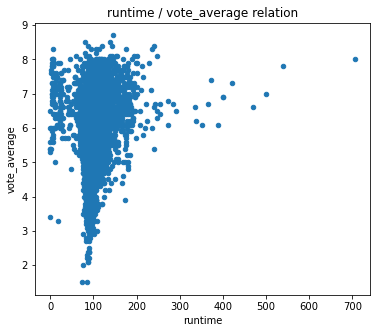

In [496]:
# Draw a plot to represent the correlation between runtime and movie ratings
scatter_plot(df, 'runtime', 'vote_average');

> Seems like there's some correlation between movie duration and movie ratings, longer movies tends to have better chances to get higher rating than short movies, since all movies that are 300 minutes (5 hours) or more has rating above 6/10.

### Research Question 2  (do old movies get higher rating that new movies? )

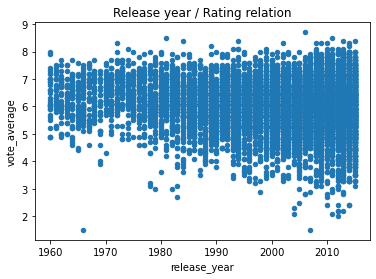

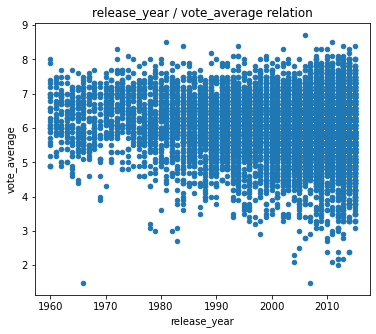

In [497]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
scatter_plot(df, 'release_year', 'vote_average');

> Seems like there's some correlation between movie release year and movie ratings, old movies tends to have better chances to get higher rating than short movies.

### Research Question 3  (What kinds of properties are associated with movies that have high revenues? ) 

In [79]:
df['vote_average'].describe()

count    8667.000000
mean        6.003496
std         0.893552
min         1.500000
25%         5.500000
50%         6.100000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

> Average movie rating is around 6/10, so I will consider that 7.5/10 and higher is a high movie rating, so lets see what are the characteristecs that movies with high rating have in common.

In [81]:
# Get all movies with rating >= 7.5
high_rating_movies = df.query('vote_average >= 7.5');
high_rating_movies

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,based on novel|mars|nasa|isolation|botanist,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,dream|cartoon|imaginary friend|animation|kid,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
12,264660,6.118847,15000000,36869414,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,dancing|artificial intelligence|helicopter|dis...,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07
27,207703,4.503789,81000000,403802136,Kingsman: The Secret Service,Taron Egerton|Colin Firth|Samuel L. Jackson|Mi...,Matthew Vaughn,spy|great britain|secret organization|secret a...,130,Crime|Comedy|Action|Adventure,Twentieth Century Fox Film Corporation|Marv Fi...,1/24/15,3833,7.6,2015,7.451997e+07,3.714978e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10686,51992,0.080626,0,0,And Soon the Darkness,Pamela Franklin|Michele Dotrice|Sandor ElÃ¨s|J...,Robert Fuest,france|language barrier|bicycle|murder|suspense,99,Mystery|Thriller,EMI Films Ltd.,9/10/70,10,7.5,1970,0.000000e+00,0.000000e+00
10693,13187,0.600975,0,0,A Charlie Brown Christmas,Ann Altieri|Chris Doran|Sally Dryer|Bill Melen...,Bill Melendez,holiday|christmas,25,Animation|Family|Comedy|TV Movie,Warner Bros. Home Video,12/9/65,84,7.6,1965,0.000000e+00,0.000000e+00
10770,11327,0.512719,2300000,35000000,Midnight Express,Brad Davis|Irene Miracle|Bo Hopkins|Randy Quai...,Alan Parker,prison|drug smuggle|attempt to escape|escape|l...,121,Drama|Crime,Columbia Pictures|Casablanca Filmworks,10/6/78,141,7.5,1978,7.688212e+06,1.169945e+08
10817,13963,0.064029,0,321952,The Last Waltz,Robbie Robertson|Rick Danko|Levon Helm|Richard...,Martin Scorsese,1970s|music,117,Documentary|Music,FM Productions|Last Waltz Inc.,5/1/78,33,8.0,1978,0.000000e+00,1.076189e+06


> First, lets compare the budget between high rating movies and other movies.

In [83]:
# Draw a chart that displays the difference in buget between high rating movies and other movies
other_movies = df.query('vote_average < 7.5')
other_movies

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,father-son relationship|rape|based on novel|mo...,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,surfer|surfboard|surfing,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,car race|racing|formula 1,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,car|trolley|stealing car,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,spoof,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [85]:
high_rating_movies['budget'].mean()

23372511.346385542

In [86]:
other_movies['budget'].mean()

17485274.92729454

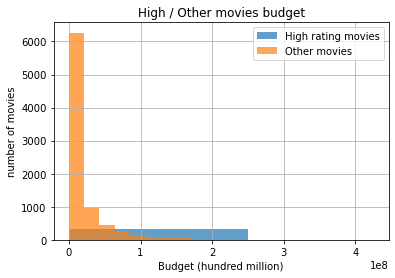

In [410]:
high_rating_movies['budget'].hist(alpha = 0.7, label = 'High rating movies', bins = 1);
other_movies['budget'].hist(alpha = 0.7,label = 'Other movies', bins = 20)
plt.legend()
plt.title('High / Other movies budget');
plt.ylabel('number of movies');
plt.xlabel('Budget (hundred million)');

> Looks like high rating movies tends to have a higher budget that other movies which is realistic.

In [283]:
high_rating_movies['runtime'].mean()

113.7078313253012

In [284]:
other_movies['runtime'].mean()

103.41967606478704

Also, We can see that higher rating movies average runtime ( duration ) is longer than movies with rating below 7.5

In [285]:
high_rating_movies['popularity'].mean()

1.9903850030120471

In [286]:
other_movies['popularity'].mean()

0.6921909833233352

when we talk about popularity, it would be more realistic that high rating movies will have higher popularity than other movies, which is what it actually is in this dataset, movies with higher rating has an average popularity of 1.99 milllion whereas other movies have an average of 692K.

> Note: I assumed that popularity number is number of people who watched the movie in millions

In [172]:
# Get genres that have more occurences with high rating movies
high_rating_movies['genres'].value_counts()

Documentary                                35
Drama                                      28
Documentary|Music                          15
Crime|Drama                                 9
Drama|Romance                               9
                                           ..
History|Drama|Thriller|War                  1
Fantasy|Drama|Crime                         1
Adventure|Family|Fantasy|Comedy|Romance     1
Adventure|Animation|Drama                   1
Adventure|Family|Fantasy                    1
Name: genres, Length: 157, dtype: int64

> it appears to be that most of the high rating movies are Documentary or Drama movies

### Research Question 4  (Which genres tends to have a higher rating movies? )

In [ ]:
> in the previuos questions we saw that Documentary and drama movies are the most genres appeared in the high rating movies, altough 35 movies of the high rating movies are Documentary movies, what if they all have rating less then 8 and other genre such as Crime|Drama which have appeared 9 times has all votes above 8? so in this case altough Documentary movies have higher occurences, but the rating average for Crime|Drama would be higher.

so in this question we will see what are the genres order of genres with their average ratings and number of movies they are associated with.

In [305]:
genres_rating = df # copy the original dataframe

genres_rating_avg = genres_rating.groupby('genres')['vote_average'].mean() # get each genre and it's average rating
high_genres_rating = {(key, value) for (key, value) in genres_rating_avg.items() if value >= 7.5} # get genres with rating average above 7.5

# 'high_rating_genres' is a set, we want to convert it into a dictionary so we can have each genre as a key and it's value 
# will be a list containing the rating average and number of movies associated with that genre

high_genres_rating_Dict = dict(high_genres_rating) # now we have each genre as key and it's rating average as value, but it's not sorted


dict(sorted(high_genres_rating_Dict.items(), key=lambda item: item[1], reverse=True)) # sort dictionary based on rating average

genres_rating_sorted = {} 
for i in high_genres_rating_Dict.keys():
    j = df.query('genres == "{}"'.format(i))
    values_list = [j['vote_average'].mean(), j.shape[0]] # store rating and number of movies in a list
    genres_rating_sorted[i] = values_list

    
genres_rating_sorted
dict(sorted(genres_count.items(), key=lambda item: item[1][0], reverse=True))

{'Family|Animation|Fantasy': [8.0, 1],
 'Fantasy|Drama|Crime': [8.0, 1],
 'History|Drama|Thriller|War': [8.0, 1],
 'Animation|Family|Romance': [8.0, 1],
 'Romance|Comedy|Animation|Drama|Family': [8.0, 1],
 'Action|Thriller|Science Fiction|Mystery|Adventure': [7.9, 1],
 'Animation|Drama|Fantasy': [7.9, 1],
 'Adventure|Comedy|Science Fiction|Family': [7.8, 1],
 'Science Fiction|Drama|Romance': [7.8, 1],
 'Animation|Romance': [7.8, 1],
 'War|Drama|Action|Adventure|History': [7.8, 1],
 'Adventure|Family|Animation|Action|Comedy': [7.8, 1],
 'Romance|Science Fiction|Drama': [7.8, 1],
 'Science Fiction|Drama|Romance|Fantasy': [7.8, 1],
 'Action|Adventure|Drama|Foreign|History': [7.8, 1],
 'Drama|Animation|War': [7.7, 1],
 'Action|Drama|Adventure': [7.7, 1],
 'Fantasy|Action|Adventure|Animation|Comedy': [7.7, 1],
 'Drama|Romance|Crime|Mystery': [7.7, 1],
 'Action|Comedy|Science Fiction|Fantasy': [7.7, 1],
 'Drama|Comedy|War': [7.7, 1],
 'Science Fiction|Mystery|Adventure': [7.7, 1],
 'Family|A

### Research Question 5  (What is the relationship between movie rating and movie revenue?  )

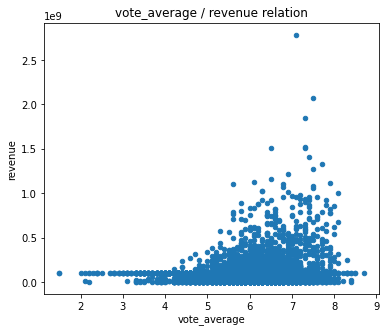

In [499]:
scatter_plot(df, 'vote_average', 'revenue');

> There seems to be a high correlation between movie rating and revenue, The higher the movie rating the higher the revenue.

### Research Question 6  (What is the relationship between movie budget and movie revenue?  )

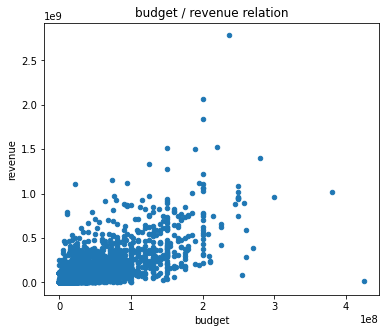

In [501]:
scatter_plot(df, 'budget', 'revenue');

> There seems to be some kind of correlation between movie budget and revenue, The higher the movie budget the higher the revenue.

<a id='conclusions'></a>
## Conclusions

> We've reached tha last part, at the beginning I've took a quick look at the data and had some questions and tried to make some assumptions regarding the questions, After that I the started wrangling process, which is cleaning the data, check for incorrect data types, remove duplicates, deal with the null values, After that I actually started analyzing the data and answered the questions I made at the first section, alongside some visuals to make it more clear.

> I guess I found out the answer for The questions I was wondering about in the first section and we concluded much more information such that:
- Older movies tends to have higher rates
- Documentary and Drama movies has the top movie ratings
- And much more!

>Limitations I faced in this dataset:
- all null values were in string columns, so I had to delete all columns with null values since I can't replace the null value with the mean of the column.
- I faced some ambiguity with some columns such as popularity, budget and revenues, I couldn't tell weather they are in millions or thousands, but I made assumptions and stated them and continued my analysis with my assumptions